In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [11]:
dataset = pd.read_csv('marketing_campaign.csv', sep=';')
dataset

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Dataset ini merupakan data responden terhadap campaign yang diberikan. Tedapat missing value pada data Income, dan untuk selanjutnya dilakukan prosesing terhadap data yang kosong.

In [13]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


Dari hasil statistik terlihat nilai mean dan median pada fitur income tidak terlihat terlalu signifikan perbedaan. Untuk missing value akan diisi oleh data median

In [14]:
df = dataset.copy()
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [15]:
df['Income'] = df.Income.fillna(df.Income.median())

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Data df menunjukkan bahwa fitur income telah dilakukan prosesing median


# Feature Extraction

1. Fitur Total Anak

In [17]:
df['dependents']= df.Kidhome + df.Teenhome
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,dependents
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,0,3,11,0,1
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,0,1,0,0,3,11,0,3
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,1,0,0,0,0,3,11,0,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,0,3,11,0,1


2. Fitur Usia

In [18]:
df['Age'] = 2022 - df.Year_Birth
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,dependents,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,0,65
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,2,68
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,0,57
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,1,38
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,1,41


3. Fitur Kelompok Usia

In [19]:
df['Segmentation']=np.where(df['Age']<=35, "Young",
                               np.where(df['Age']<=50, 'Adult',
                                        np.where(df['Age']<75, 'Mature', 'Old')))
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,dependents,Age,Segmentation
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,0,65,Mature
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,2,68,Mature
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,0,57,Mature
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,1,38,Adult
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,1,41,Adult


4. Fitur Total Produk

In [20]:
# Total Product
prod_cols = [col for col in df.columns if 'Mnt' in col]
prod_cols
df['Total_Prod'] = (df[prod_cols].sum(axis=1)) 
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,dependents,Age,Segmentation,Total_Prod
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,0,65,Mature,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,2,68,Mature,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,0,57,Mature,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,1,38,Adult,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,1,41,Adult,422


5. Fitur Total Pembelian

In [21]:
# Total Purchases
purchases_cols = [col for col in df.columns if 'Purchases' in col]
purchases_cols
df['Total_Purchases'] = df[purchases_cols].sum(axis=1)
# df['Total_Purchases'] = df['Total_Purchases'] - df['NumDealsPurchases'] 

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,dependents,Age,Segmentation,Total_Prod,Total_Purchases
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,0,65,Mature,1617,25
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,2,68,Mature,27,6
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,0,57,Mature,776,21
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,0,1,38,Adult,53,8
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,1,41,Adult,422,19


In [22]:
df=df[df['Total_Purchases']>0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2236 non-null   int64  
 1   Year_Birth           2236 non-null   int64  
 2   Education            2236 non-null   object 
 3   Marital_Status       2236 non-null   object 
 4   Income               2236 non-null   float64
 5   Kidhome              2236 non-null   int64  
 6   Teenhome             2236 non-null   int64  
 7   Dt_Customer          2236 non-null   object 
 8   Recency              2236 non-null   int64  
 9   MntWines             2236 non-null   int64  
 10  MntFruits            2236 non-null   int64  
 11  MntMeatProducts      2236 non-null   int64  
 12  MntFishProducts      2236 non-null   int64  
 13  MntSweetProducts     2236 non-null   int64  
 14  MntGoldProds         2236 non-null   int64  
 15  NumDealsPurchases    2236 non-null   i

In [23]:
df2=df.copy()
df2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,dependents,Age,Segmentation,Total_Prod,Total_Purchases
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,0,65,Mature,1617,25
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,2,68,Mature,27,6
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,0,57,Mature,776,21
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,0,1,38,Adult,53,8
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,1,41,Adult,422,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,3,11,0,1,55,Mature,1341,18
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,3,11,0,3,76,Old,444,22
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,3,11,0,0,41,Adult,1241,19
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,3,11,0,1,66,Mature,843,23


In [24]:
# df['Segmentation']=np.where(df['Age']<=35, "Young",
df2['Response'] = np.where(df2['Response']==0,'Not Accepted Campaign','Accepted Campaign')
df2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,dependents,Age,Segmentation,Total_Prod,Total_Purchases
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,Accepted Campaign,0,65,Mature,1617,25
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,Not Accepted Campaign,2,68,Mature,27,6
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,Not Accepted Campaign,0,57,Mature,776,21
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,Not Accepted Campaign,1,38,Adult,53,8
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,Not Accepted Campaign,1,41,Adult,422,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,3,11,Not Accepted Campaign,1,55,Mature,1341,18
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,3,11,Not Accepted Campaign,3,76,Old,444,22
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,3,11,Not Accepted Campaign,0,41,Adult,1241,19
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,3,11,Not Accepted Campaign,1,66,Mature,843,23


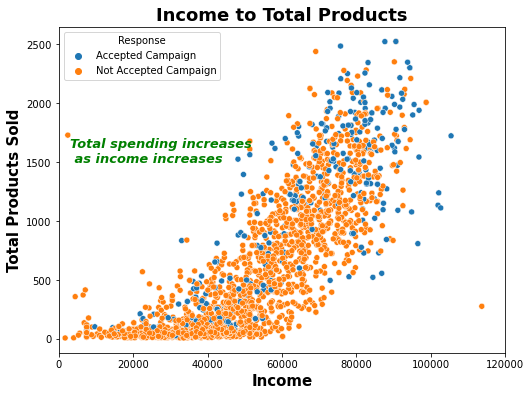

In [25]:
import matplotlib.patches as mpatches
plt.figure(figsize=(8,6))
sns.scatterplot(x='Income' , y='Total_Prod', hue='Response', data=df2)
plt.title('Income to Total Products', fontsize=18, fontweight='bold')
# plt.xlabel(fontweight='bold')
# plt.ylabel(fontweight='bold')
left, bottom, width, height = (0,900,40000, 400)
rect = mpatches.Rectangle((left,bottom),width,height, fill=False, 
                          alpha=0.2, facecolor='red', edgecolor='black', linewidth=12)
plt.text(3000, 1500, "Total spending increases\n as income increases", fontsize=13, fontstyle='italic',
        color='green', fontweight='bold')
plt.xlabel('Income',fontsize=15,fontweight='bold')
plt.ylabel('Total Products Sold',fontsize=15, fontweight='bold')
plt.xlim(0,120000)
plt.show()

Semakin tinggi Income customer cenderung meningkat pula jumlah barang yang dibeli. Bila dilihat customer customer yang menerima campaign juga merupakan customer customer yang incomenya tinggi. Memberikan rekomendasi langsung ke customer income tinggi yang datang langsung ke toko, ataupun melalui web perusahaan. 

In [36]:
df3 = df2.groupby('Response').agg({'MntWines':'sum',
                                   'MntMeatProducts':'sum',
                                   'MntSweetProducts':'sum',
                                   'MntFruits':'sum',
                                   'MntFishProducts':'sum',
                                   'MntGoldProds':'sum'})
df3= df3.T.reset_index()
df3 = df3.rename(columns={'index':'Products',
                         'Accepted Campaign':'Total Products Sold (AC)',
                         'Not Accepted Campaign': 'Total Products Sold (NAC)'})
df3=df3.sort_values('Total Products Sold (AC)', ascending=False)
df3

Response,Products,Total Products Sold (AC),Total Products Sold (NAC)
0,MntWines,167903,512906
1,MntMeatProducts,98314,275649
5,MntGoldProds,20523,78082
4,MntFishProducts,17385,66669
2,MntSweetProducts,12904,47715
3,MntFruits,12760,46153


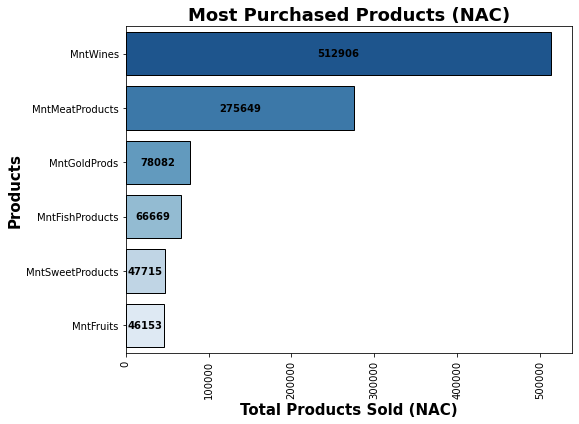

In [37]:
import matplotlib.patches as mpatches
plt.figure(figsize=(8,6))
ax=sns.barplot(y='Products', x='Total Products Sold (NAC)', data=df3, palette='Blues_r', edgecolor='black')
plt.xticks(rotation=90)
for label in ax.containers:
    ax.bar_label(label, fontweight='bold', label_type='center')
plt.title('Most Purchased Products (NAC)', fontsize=18, fontweight='bold')
plt.xlabel('Total Products Sold (NAC)',fontsize=15,fontweight='bold')
plt.ylabel('Products',fontsize=15, fontweight='bold')
plt.show()

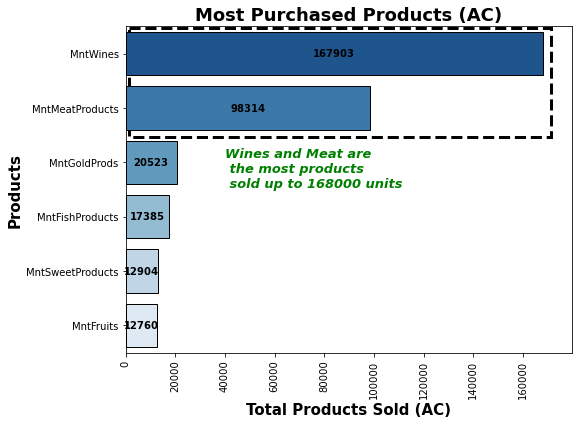

In [32]:
import matplotlib.patches as mpatches
plt.figure(figsize=(8,6))
left, bottom, width, height = (1200,-0.47, 170000 , 2)
rect = mpatches.Rectangle((left,bottom),width,height, fill=False, 
                          edgecolor='black',linestyle='--', linewidth=3)
plt.gca().add_patch(rect)

ax=sns.barplot(y='Products', x='Total Products Sold (AC)', data=df3, palette='Blues_r', edgecolor='black')
plt.xticks(rotation=90)
for label in ax.containers:
    ax.bar_label(label, fontweight='bold', label_type='center')
plt.title('Most Purchased Products (AC)', fontsize=18, fontweight='bold')
plt.text(40000, 2.45, 'Wines and Meat are\n the most products\n sold up to 168000 units', fontsize=13, fontstyle='italic',
        color='green', fontweight='bold')
plt.xlabel('Total Products Sold (AC)',fontsize=15,fontweight='bold')
plt.ylabel('Products',fontsize=15, fontweight='bold')
plt.show()

Berdasarkan jumlah produk yang terjual , didapatkan produk favorit customer adalah daging dan wines. Namun, jumlah pembelian yang dilakukan oleh orang orang yang menolak campaign jauh lebih banyak dari mereka yang menerima campaign. Penting untuk dilakukan analisis mengapa hal ini bisa terjadi. Salah satu cara untuk menjawab ini adalah memberikan poster atau iklan melalui website, e-catalog, banner untuk meningkatkan interest dan experience calon customer.

In [38]:
df4= df2.copy()
df4 = df4[df4['Income']>=70000]
df4

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,dependents,Age,Segmentation,Total_Prod,Total_Purchases
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,Not Accepted Campaign,0,57,Mature,776,21
15,2114,1946,PhD,Single,82800.0,0,0,2012-11-24,23,1006,...,0,0,3,11,Accepted Campaign,0,76,Old,1315,26
18,6565,1949,Master,Married,76995.0,0,1,2013-03-28,91,1012,...,0,0,3,11,Not Accepted Campaign,1,73,Mature,1782,26
29,1966,1965,PhD,Married,84618.0,0,0,2013-11-22,96,684,...,0,0,3,11,Not Accepted Campaign,0,57,Mature,1672,26
40,8601,1980,Graduation,Married,80011.0,0,1,2013-04-29,3,421,...,0,0,3,11,Not Accepted Campaign,1,42,Adult,1395,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10469,1981,Graduation,Together,88325.0,0,0,2014-02-05,42,519,...,0,0,3,11,Not Accepted Campaign,0,41,Adult,1623,18
2213,3661,1995,2n Cycle,Single,80617.0,0,0,2012-10-12,42,594,...,0,0,3,11,Not Accepted Campaign,0,27,Young,1435,19
2217,9589,1948,PhD,Widow,82032.0,0,0,2014-04-05,54,332,...,0,0,3,11,Not Accepted Campaign,0,74,Mature,1234,17
2221,7366,1982,Master,Single,75777.0,0,0,2013-07-04,12,712,...,0,0,3,11,Accepted Campaign,0,40,Adult,1438,21


In [42]:
df4.Response.value_counts()

Not Accepted Campaign    364
Accepted Campaign        142
Name: Response, dtype: int64

In [45]:
df5 = df4.groupby('Response').agg({'NumStorePurchases':'sum',
                                   'NumWebPurchases':'sum',
                                   'NumCatalogPurchases':'sum',
                                  'NumDealsPurchases':'sum'}).T.reset_index()
df5= df5.rename(columns={'index':'Purchases',
                         'Accepted Campaign':'Total Purchases (AC)',
                        'Not Accepted Campaign':'Total Purchases (NAC)'})
df5=df5.sort_values('Total Purchases (AC)', ascending=False)
df5

Response,Purchases,Total Purchases (AC),Total Purchases (NAC)
0,NumStorePurchases,1093,3125
2,NumCatalogPurchases,916,2041
1,NumWebPurchases,801,1868
3,NumDealsPurchases,146,565


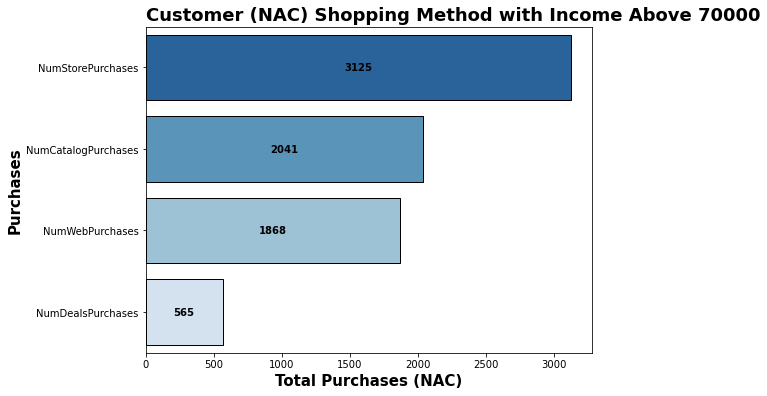

In [46]:
import matplotlib.patches as mpatches
plt.figure(figsize=(8,6))
# left, bottom, width, height = (1200,-0.47, 170000 , 2)
# rect = mpatches.Rectangle((left,bottom),width,height, fill=False, 
                          # edgecolor='black',linestyle='--', linewidth=3)
# plt.gca().add_patch(rect)

ax=sns.barplot(y='Purchases', x='Total Purchases (NAC)', data=df5, palette='Blues_r', edgecolor='black')
# plt.xticks(rotation=90)
for label in ax.containers:
    ax.bar_label(label, fontweight='bold', label_type='center')
plt.title('Customer (NAC) Shopping Method with Income Above 70000', fontsize=18, fontweight='bold', loc='left')
# plt.text(40000, 2.45, 'Wines and Meat are\n the most products\n sold up to 168000 units', fontsize=13, fontstyle='italic',
        # color='blue', fontweight='bold')
plt.xlabel('Total Purchases (NAC)',fontsize=15,fontweight='bold')
plt.ylabel('Purchases',fontsize=15, fontweight='bold')
plt.show()

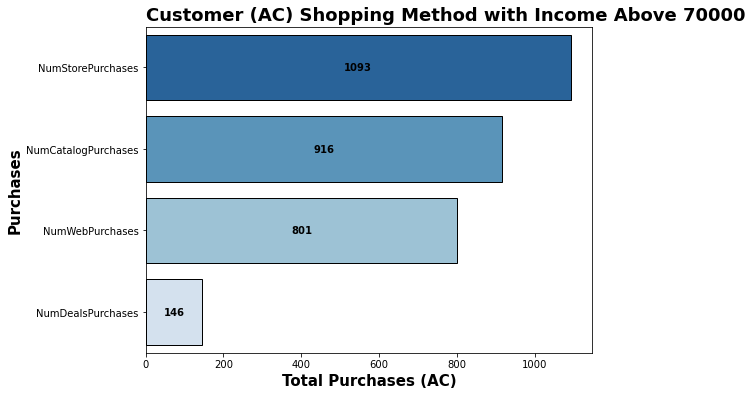

In [47]:
import matplotlib.patches as mpatches
plt.figure(figsize=(8,6))
# left, bottom, width, height = (1200,-0.47, 170000 , 2)
# rect = mpatches.Rectangle((left,bottom),width,height, fill=False, 
                          # edgecolor='black',linestyle='--', linewidth=3)
# plt.gca().add_patch(rect)

ax=sns.barplot(y='Purchases', x='Total Purchases (AC)', data=df5, palette='Blues_r', edgecolor='black')
# plt.xticks(rotation=90)
for label in ax.containers:
    ax.bar_label(label, fontweight='bold', label_type='center')
plt.title('Customer (AC) Shopping Method with Income Above 70000', fontsize=18, fontweight='bold', loc='left')
# plt.text(40000, 2.45, 'Wines and Meat are\n the most products\n sold up to 168000 units', fontsize=13, fontstyle='italic',
        # color='blue', fontweight='bold')
plt.xlabel('Total Purchases (AC)',fontsize=15,fontweight='bold')
plt.ylabel('Purchases',fontsize=15, fontweight='bold')
plt.show()

Dikelompokkan customer dengan Income tinggi di atas USD70000, dan didapatkan informasi bahwa Customer kaya ini lebih senang untuk datang langsung ke toko dan melihat lihat produk melalui katalog. Berikan pelayanan yang baik apabila customer datang ke toko, modifikasi tampilan catalog dan yakinkan customer bahwa kualitas produk sama dengan yang ada di katalog

In [48]:
df6 = df.copy()
df6
df7 = df6.groupby('NumCatalogPurchases').agg({'MntWines':'sum',
                                   'MntMeatProducts':'sum',
                                   'MntSweetProducts':'sum',
                                   'MntFruits':'sum',
                                   'MntFishProducts':'sum',
                                   'MntGoldProds':'sum'}).T.reset_index()
df7['Total'] = (df7[1]+df7[3]+df7[4]+df7[5]+df7[6]+df7[2]+
                df7[7]+df7[8]+df7[9]+df7[10]+df7[11]+df7[22]+df7[28])
df7= df7.sort_values('Total', ascending=False)
df7 = df7.rename(columns={'index':'Products'})
df7


NumCatalogPurchases,Products,0,1,2,3,4,5,6,7,8,9,10,11,22,28,Total
0,MntWines,11713,53496,87563,95986,106750,82433,83260,50112,36633,29040,32003,11743,20,57,669096
1,MntMeatProducts,9290,22160,34514,39384,50335,49938,57557,36376,21578,16419,20089,9669,1582,5072,364673
5,MntGoldProds,5594,13795,14249,11300,12850,10878,10126,6661,3803,3364,4070,1908,1,6,93011
4,MntFishProducts,2613,6188,8869,10166,11404,10294,10441,8910,5602,3687,4696,1163,1,20,81441
2,MntSweetProducts,2273,4185,7160,6987,8056,7359,8289,6214,3418,2978,2659,1034,2,5,58346
3,MntFruits,1830,3877,7430,7086,9252,6704,8062,4968,3279,2073,2893,1440,2,17,57083


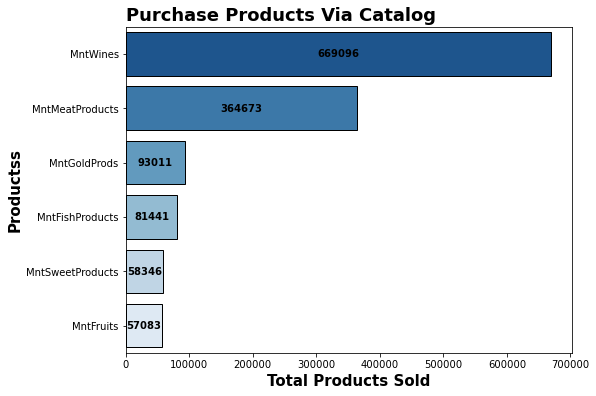

In [49]:
import matplotlib.patches as mpatches
plt.figure(figsize=(8,6))

ax=sns.barplot(x='Total', y='Products', data=df7, palette='Blues_r', edgecolor='black')
for label in ax.containers:
    ax.bar_label(label, fontweight='bold', label_type='center')
plt.title('Purchase Products Via Catalog', fontsize=18, fontweight='bold', loc='left')
plt.xlabel('Total Products Sold',fontsize=15,fontweight='bold')
plt.ylabel('Productss',fontsize=15, fontweight='bold')
plt.show()

In [50]:
df8 = df.copy()
df8
df9 = df8.groupby('NumDealsPurchases').agg({'MntWines':'sum',
                                   'MntMeatProducts':'sum',
                                   'MntSweetProducts':'sum',
                                   'MntFruits':'sum',
                                   'MntFishProducts':'sum',
                                   'MntGoldProds':'sum'}).T.reset_index()
df9['Total'] = (df9[1]+df9[2]+df9[3]+df9[4]+df9[5]+df9[6]+
                df9[7]+df9[8]+df9[9]+df9[10]+df9[11]+df9[12]+df9[13]+df9[15])
df9= df9.sort_values('Total', ascending=False)
df9 = df9.rename(columns={'index':'Total Products'})
df9

NumDealsPurchases,Total Products,0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,Total
0,MntWines,24181,317011,115829,80201,55437,32960,20936,15090,5975,3166,1941,4360,1628,1424,670,656628
1,MntMeatProducts,20139,225490,45027,30384,19049,10936,6718,4992,1776,1073,1282,738,718,461,5180,353824
5,MntGoldProds,3515,42123,19457,11538,7828,4870,3813,2783,970,418,318,369,138,360,105,95090
4,MntFishProducts,3139,47855,14131,7853,4543,2033,1982,1214,397,149,117,103,75,286,177,80915
2,MntSweetProducts,3300,33270,9555,5662,3721,1875,1406,535,372,185,173,77,103,270,115,57319
3,MntFruits,2500,32976,9569,5248,3640,2019,1296,918,283,90,146,46,42,55,85,56413


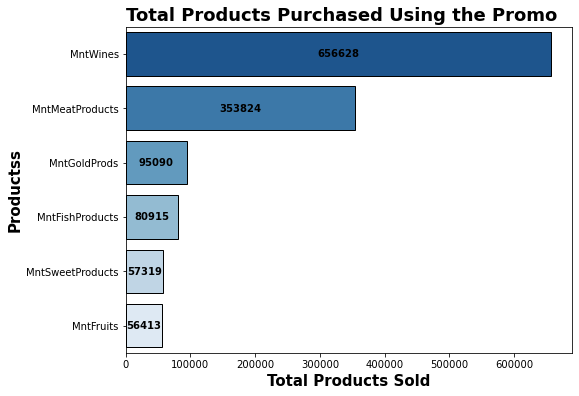

In [51]:
import matplotlib.patches as mpatches
plt.figure(figsize=(8,6))

ax=sns.barplot(x='Total', y='Total Products', data=df9, palette='Blues_r', edgecolor='black')
for label in ax.containers:
    ax.bar_label(label, fontweight='bold', label_type='center')
plt.title('Total Products Purchased Using the Promo', fontsize=18, fontweight='bold', loc='left')
plt.xlabel('Total Products Sold',fontsize=15,fontweight='bold')
plt.ylabel('Productss',fontsize=15, fontweight='bold')
plt.show()

Baik via catalog dan via promo menunjukkan hasil yang sama yaitu customer memiliki favorit di produk daging dan wines

In [54]:
df10 = df2.copy()
df10
df11 = df10.groupby(['NumWebVisitsMonth','Response']).agg({'ID':'nunique'}).reset_index()
df11 = df11.sort_values('ID', ascending=False)
df11
df11 = df11.rename(columns={'ID':'Total Customer'})
df11
                   

,NumWebVisitsMonth,Response,Total Customer
14,7,Not Accepted Campaign,348
12,6,Not Accepted Campaign,292
16,8,Not Accepted Campaign,285
10,5,Not Accepted Campaign,256
8,4,Not Accepted Campaign,192
6,3,Not Accepted Campaign,172
4,2,Not Accepted Campaign,162
2,1,Not Accepted Campaign,123
15,8,Accepted Campaign,57
18,9,Not Accepted Campaign,54


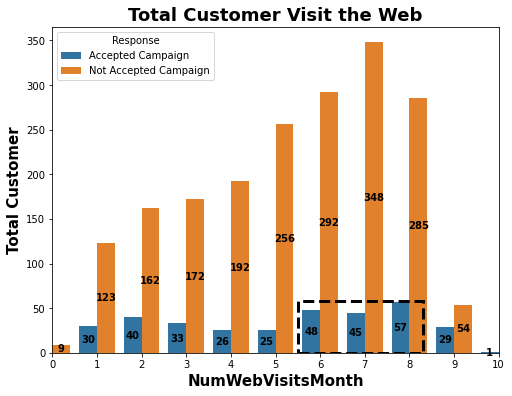

In [57]:
import matplotlib.patches as mpatches
plt.figure(figsize=(8,6))
ax=sns.barplot(x='NumWebVisitsMonth', y='Total Customer', data=df11, hue='Response', 
               hue_order=["Accepted Campaign", "Not Accepted Campaign"], dodge=True)
left, bottom, width, height = (5.5,0, 2.8 , 58)
rect = mpatches.Rectangle((left,bottom),width,height, fill=False, 
                          edgecolor='black',linestyle='--', linewidth=3)
plt.gca().add_patch(rect)
for label in ax.containers:
    ax.bar_label(label, fontweight='bold', label_type='center')
plt.xlim(0,10)

plt.title('Total Customer Visit the Web', fontsize=18, fontweight='bold', loc='center')
plt.xlabel('NumWebVisitsMonth',fontsize=15,fontweight='bold')
plt.ylabel('Total Customer',fontsize=15, fontweight='bold')
plt.show()


In [58]:
df12=df11[df11['Response'].isin(['Accepted Campaign'])]
df12 = df12.sort_values('Total Customer',ascending=False)

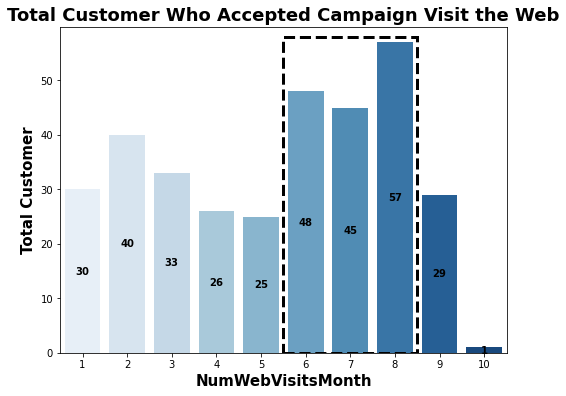

In [59]:
import matplotlib.patches as mpatches
plt.figure(figsize=(8,6))
ax=sns.barplot(x='NumWebVisitsMonth', y='Total Customer', data=df12, palette='Blues')
for label in ax.containers:
    ax.bar_label(label, fontweight='bold', label_type='center')
# plt.xlim(-0,5,10)
left, bottom, width, height = (4.5,0, 3 , 58)
rect = mpatches.Rectangle((left,bottom),width,height, fill=False, 
                          edgecolor='black',linestyle='--', linewidth=3)
plt.gca().add_patch(rect)
plt.title('Total Customer Who Accepted Campaign Visit the Web', fontsize=18, fontweight='bold', loc='center')
plt.xlabel('NumWebVisitsMonth',fontsize=15,fontweight='bold')
plt.ylabel('Total Customer',fontsize=15, fontweight='bold')
plt.show()

Ini merupakan jumlah customer accepted campaign yang mengunjungi web perusahaan dalam 1 bulan terakhir, di dominasi oleh customer yang berkunjung 6-8 kali. Pada akun customer ini tolong diberikan rekomendasi dengan mengubah tampilan web menjadi produk produk yang paling sering mereka beli untuk tetap menjaga hubungan antara customer dengan perusahaan kita